In [1]:
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import drlqap.experiment as exp
from drlqap.evaltools import load_float_txt

In [2]:
runs_root = Path('../runs')
for c in runs_root.iterdir():
    print(c.name)

dqn_dense_ms_ec_eps0_smallrandoms
reinforce_ms100x_mediumrandoms
dqn_linkedqap_smallrandoms
a2c_ms100x_mediumrandoms_cyclic_wronglr
reinforce_ms100x_smallrandoms
a2c_ms100x_mediumrandoms
a2c_ms100x_mediumrandoms_cyclic
dqn_dense_ms_ec_eps0_mediumrandoms
a2c_mediumrandoms
dqn_dense_ms_ec_eps0_rni_study


In [3]:
def load_experiments(experiment_names):
    paths = []
    for experiment in experiment_names:
        paths += sorted((runs_root / experiment).iterdir())

    metadatas = [exp.load_metadata(path) for path in paths]
    values = [load_float_txt(path / "value.txt") for path in paths]

    metadata = [
        {
            'path': path,
            'seed': meta['seed'],
            'agent_type': meta['agent_type'],
            **meta['agent_arguments'],
        }
        for path, meta in zip(paths, metadatas)
    ]
    meta_df = pd.DataFrame(metadata).fillna(-1) # default values == -1
    meta_index = pd.MultiIndex.from_frame(meta_df)
    return pd.DataFrame(values, index = meta_index)

In [4]:
def aggregate(df, key, window, agg):
        return df.groupby(key).aggregate(agg).transpose().rolling(window).mean()

def generate_variation_plot(df, keys, window):
    if type(keys) != list:
        keys = [keys]
    
    mean = aggregate(df, keys, window, 'mean')
    upper = aggregate(df, keys, window, 'max')
    lower = aggregate(df, keys, window, 'min')
    cmap = matplotlib.cm.get_cmap('tab10')
    count = len(mean.columns)
    for i, col in enumerate(mean.columns):
        color = cmap(i)
        #plt.fill_between(mean[col].index, lower[col], upper[col], alpha=0.1, color=color)
        if len(keys) > 1:
            matching_indices = None
            for i, k in enumerate(keys):
                m = df.index.get_level_values(k) == col[i] 
                matching_indices = matching_indices & m if matching_indices is not None else m
        else:
            matching_indices = (df.index.get_level_values(keys[0]) == col)
        individuals = df[matching_indices].transpose().rolling(window).mean()
        for i in individuals:
            plt.plot(individuals[i], alpha=0.15, linewidth=8, color=color)
        plt.plot(mean[col], label=col, color=color, linewidth=2)
    plt.legend()

# Plots on medium_random_graphs (n=16)

## DQN vs A2C

In [38]:
df = load_experiments(["a2c_ms100x_mediumrandoms", "dqn_dense_ms_ec_eps0_mediumrandoms"])
df = df.query('agent_type != "dqn_dense_ms_ec_eps0" | learning_rate > 1e-5') # Drop bad DQN lr

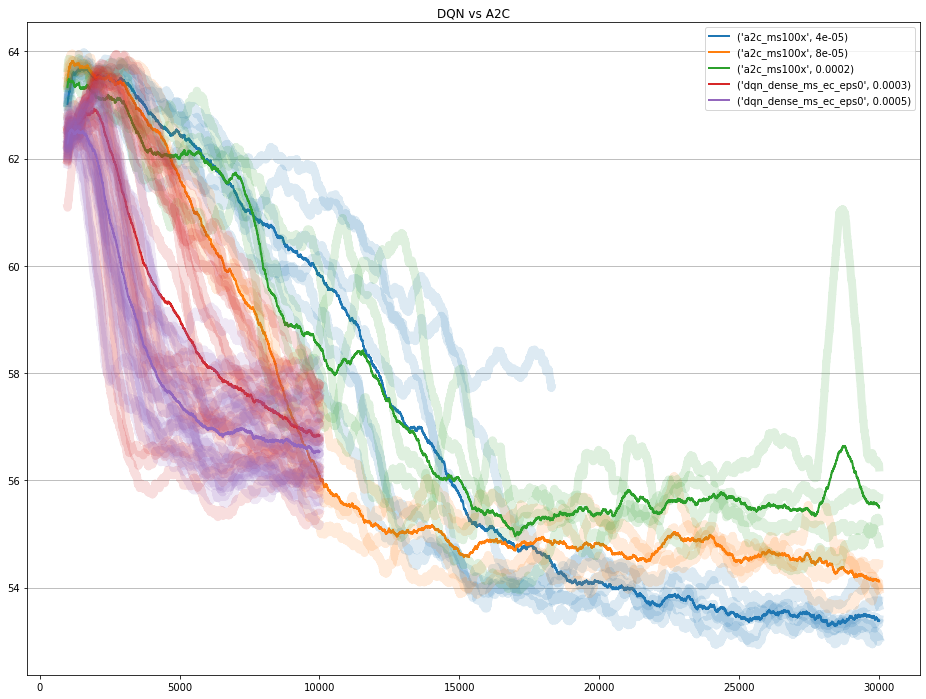

In [40]:
plt.figure(figsize=(16, 12))
plt.title("DQN vs A2C")
plt.grid(axis='y')
generate_variation_plot(df, ['agent_type', 'learning_rate'], 1000)

## A2C hyperparameters

In [23]:
df = load_experiments(["a2c_ms100x_mediumrandoms"])

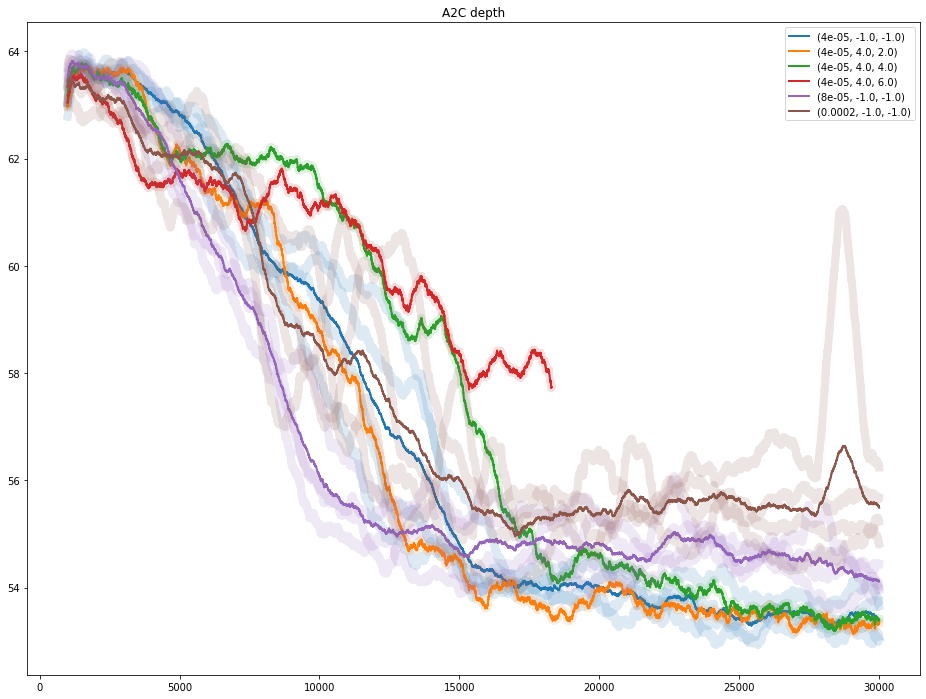

In [24]:
plt.figure(figsize=(16, 12))
plt.title("A2C depth")
generate_variation_plot(df, ['learning_rate', 'gnn_depth', 'mlp_depth'], 1000)

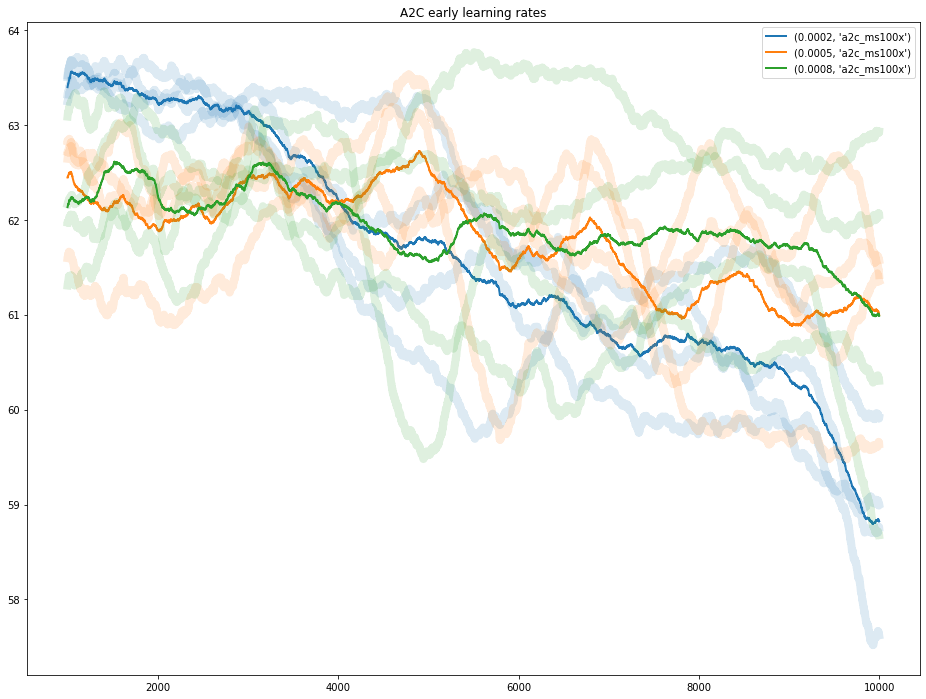

In [25]:
df = load_experiments(["a2c_mediumrandoms"])
plt.figure(figsize=(16, 12))
plt.title("A2C early learning rates")
generate_variation_plot(df.query('agent_type=="a2c_ms100x"'), ['learning_rate', 'agent_type'], 1000)

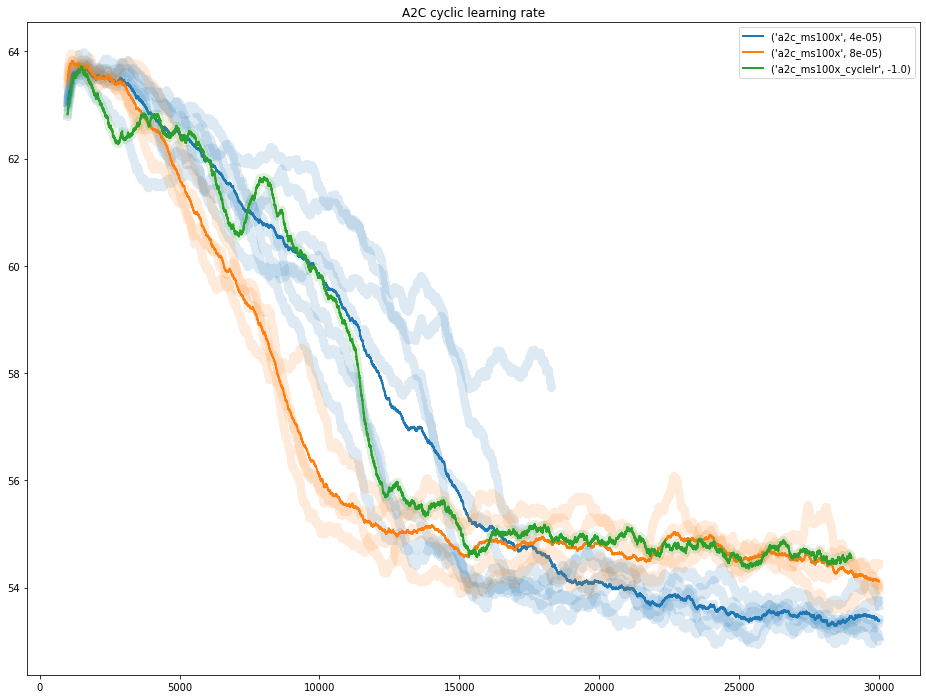

In [99]:
df = load_experiments(["a2c_ms100x_mediumrandoms_cyclic", "a2c_ms100x_mediumrandoms"])
plt.figure(figsize=(16, 12))
plt.title("A2C cyclic learning rate")
generate_variation_plot(df.query("learning_rate <= 8e-5"), ['agent_type', 'learning_rate'], 1000)

In [96]:
with open("../runs/a2c_ms100x_mediumrandoms_cyclic/s1/learning_rate.txt") as f:
    lines = f.readlines()
    lrs = [float(l[1:-2]) for l in lines]

In [ ]:
df = load_experiments(["a2c_ms100x_mediumrandoms_cyclic"])

plt.figure(figsize=(14,12))
generate_variation_plot(df, ['agent_type'], 200)
ax2 = plt.gca().twinx()
ax2.plot(lrs, linestyle='dashed', color='magenta')
#ax2.semilogy()
plt.grid()

## DQN hyperparameters

In [13]:
df = load_experiments(["dqn_dense_ms_ec_eps0_mediumrandoms"])
df

,,,,,,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
path,seed,agent_type,learning_rate,gnn_depth,hidden_size,,,,,,,,,,,,,,,,,,,,,
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1,1,dqn_dense_ms_ec_eps0,0.00001,2,32,62.841865,65.490401,68.707125,75.261609,63.292314,60.738216,54.910917,60.493837,60.892021,57.181462,...,57.610738,73.636183,58.511356,62.658604,70.670330,58.216936,59.546621,60.288765,56.687721,64.662555
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1_2,1,dqn_dense_ms_ec_eps0,0.00001,2,64,60.356959,63.078010,66.283673,72.765786,64.585302,64.282793,59.403110,61.344454,63.112754,58.763897,...,60.221531,68.832918,59.357369,68.874979,69.478466,59.881630,58.392156,59.255112,57.148568,62.780570
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1_3,1,dqn_dense_ms_ec_eps0,0.00001,3,32,54.686776,58.461986,63.025775,68.389831,62.294490,58.678956,48.563840,59.759038,61.178057,54.712605,...,58.646611,69.548056,56.015146,66.812284,67.316161,60.276051,58.512473,61.266946,59.431332,59.992208
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1_4,1,dqn_dense_ms_ec_eps0,0.00001,3,64,58.385339,60.947965,63.547658,71.026318,61.822749,61.701449,55.487429,57.327797,61.547429,56.381626,...,61.841229,72.983782,60.837985,68.273690,71.157797,60.135977,60.187867,61.964549,60.300097,61.992169
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr1e-5_s1_5,1,dqn_dense_ms_ec_eps0,0.00001,4,32,55.460938,59.356697,64.829594,71.535649,63.504378,59.686943,50.264630,59.263085,60.502248,53.892105,...,58.116716,71.316431,55.270159,66.281966,68.484719,63.854575,59.444276,59.552176,57.791123,63.628054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s4_2,4,dqn_dense_ms_ec_eps0,0.00050,2,64,61.176668,71.078549,59.189540,60.295811,61.490146,62.197090,60.236941,59.768797,66.969204,63.611880,...,59.560716,58.254913,64.918829,63.620757,50.328181,58.852243,67.188024,50.903086,52.997864,55.459646
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s4_3,4,dqn_dense_ms_ec_eps0,0.00050,3,32,58.853293,67.119416,52.905575,62.037932,64.790740,64.616323,59.261795,60.488099,63.614550,65.135172,...,58.942887,59.487716,59.399419,57.194373,48.820438,56.673281,64.175987,54.129994,50.647840,53.559300
../runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s4_4,4,dqn_dense_ms_ec_eps0,0.00050,3,64,61.478632,66.584907,55.774553,60.779691,59.374717,66.230713,59.435740,62.442952,67.061312,65.964528,...,61.036165,59.956248,62.730097,60.172450,49.475091,60.381024,66.427817,51.918718,49.571024,56.136221


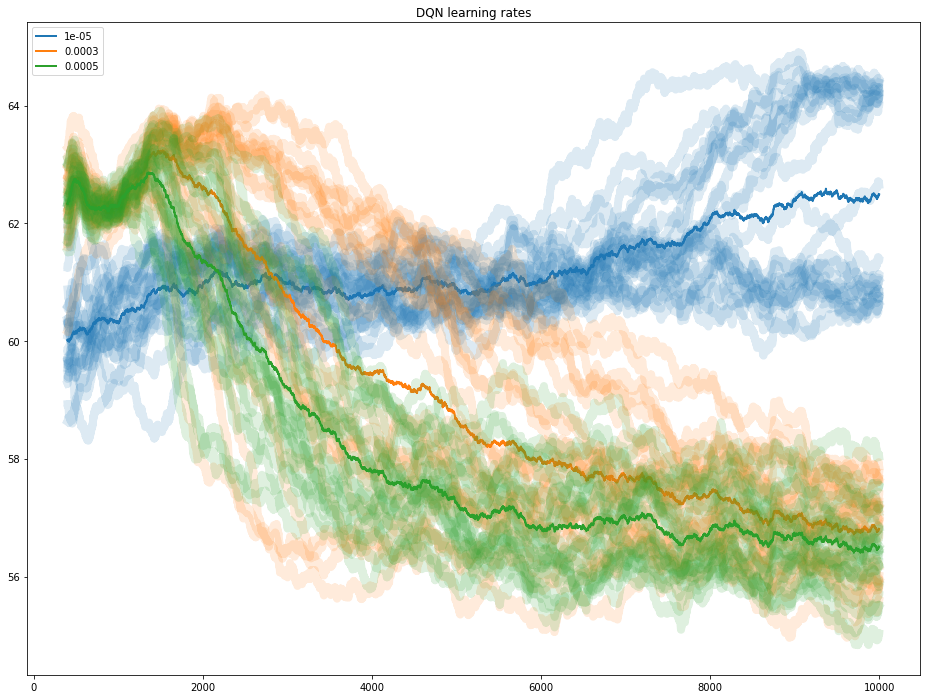

In [14]:
plt.figure(figsize=(16, 12))
plt.title("DQN learning rates")
generate_variation_plot(df, ['learning_rate'], 400)

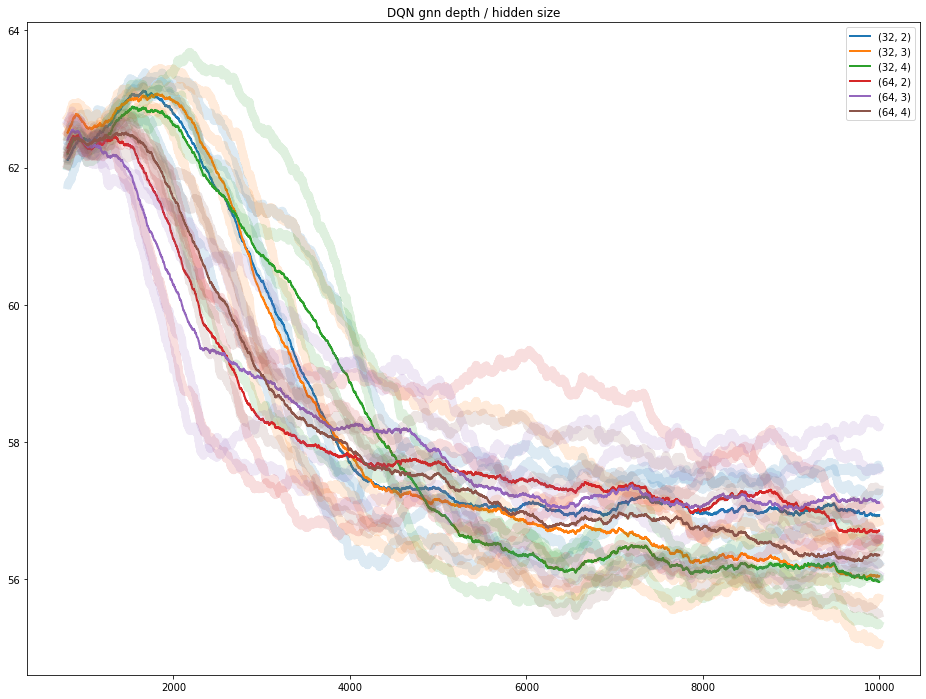

In [15]:
plt.figure(figsize=(16, 12))
plt.title("DQN gnn depth / hidden size")
generate_variation_plot(df.query('learning_rate == 5e-4'), ['hidden_size', 'gnn_depth'], 800)

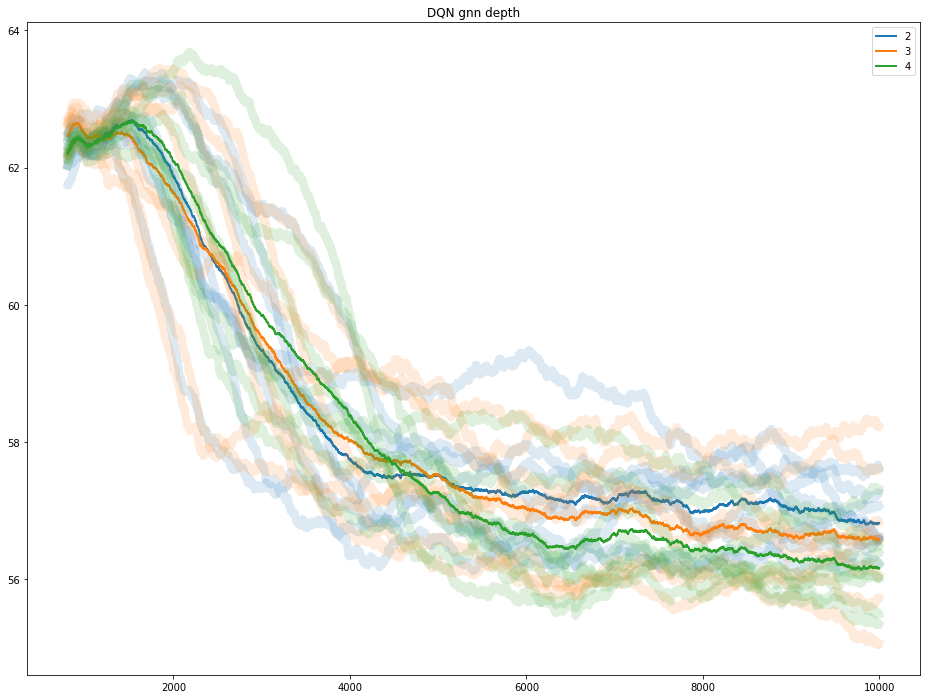

In [16]:
plt.figure(figsize=(16, 12))
plt.title("DQN gnn depth")
generate_variation_plot(df.query('learning_rate == 5e-4'), ['gnn_depth'], 800)

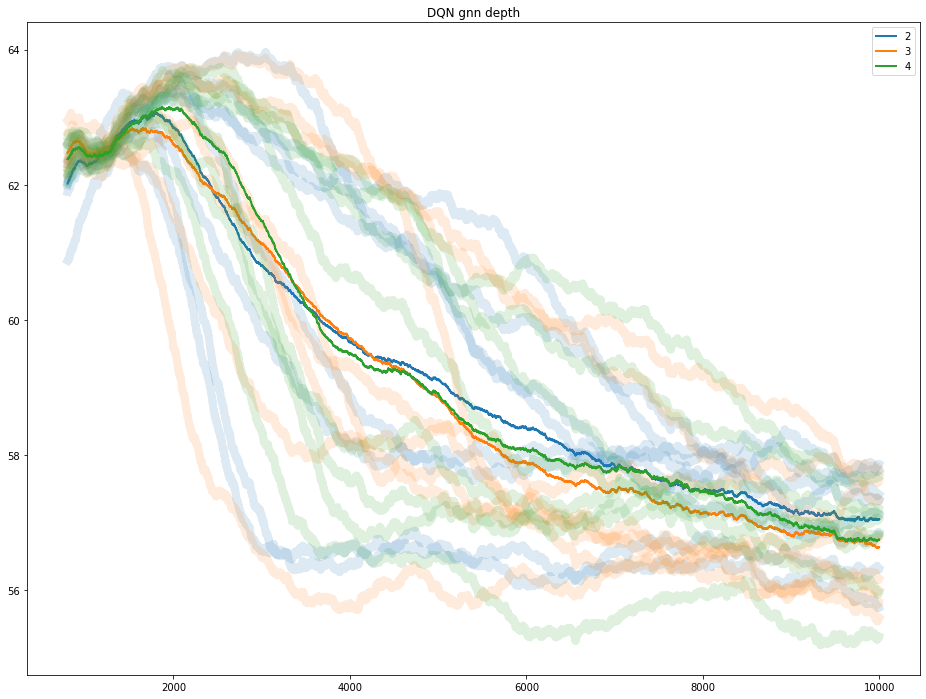

In [17]:
plt.figure(figsize=(16, 12))
plt.title("DQN gnn depth")
generate_variation_plot(df.query('learning_rate == 3e-4'), ['gnn_depth'], 800)

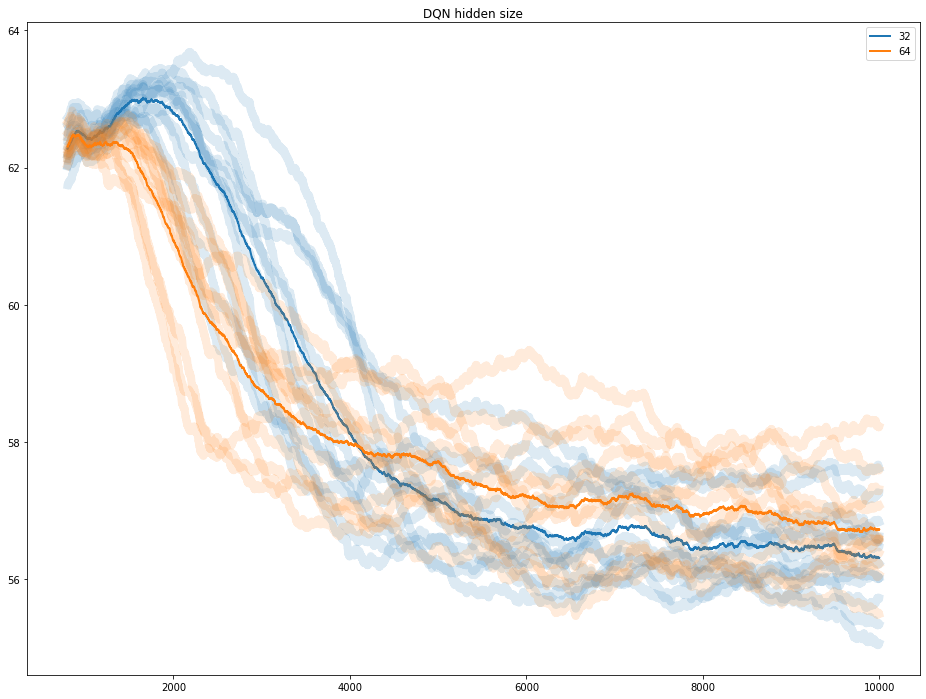

In [18]:
plt.figure(figsize=(16, 12))
plt.title("DQN hidden size")
generate_variation_plot(df.query('learning_rate == 5e-4'), ['hidden_size'], 800)

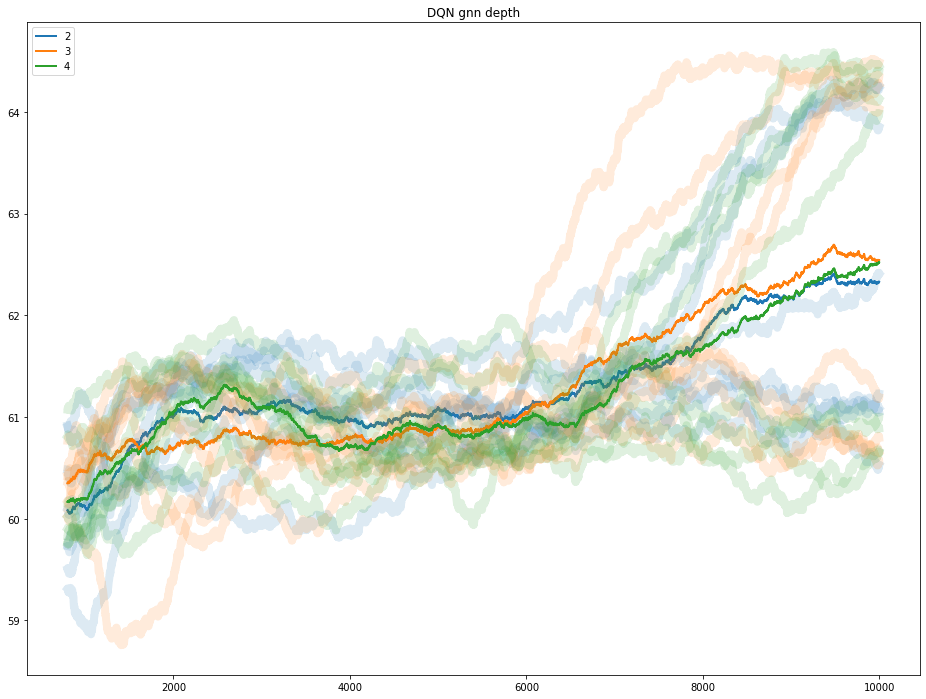

In [19]:
plt.figure(figsize=(16, 12))
plt.title("DQN gnn depth")
generate_variation_plot(df.query('learning_rate == 1e-5'), ['gnn_depth'], 800)

## A2C vs REINFORCE

In [20]:
df = load_experiments(["a2c_ms100x_mediumrandoms", "reinforce_ms100x_mediumrandoms"])
df.query('agent_type == "reinforce_ms100x"')

,,,,,,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
path,seed,agent_type,learning_rate,gnn_depth,mlp_depth,,,,,,,,,,,,,,,,,,,,,
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s1,1,reinforce_ms100x,0.00020,-1.0,-1.0,55.767970,60.074306,64.126662,67.381259,57.619807,64.684408,58.954615,52.274755,57.479719,63.156055,...,62.663570,55.943843,54.471972,66.749416,64.433755,58.043607,55.027976,42.406886,60.607674,60.615890
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s2,2,reinforce_ms100x,0.00020,-1.0,-1.0,58.414899,64.999871,60.869191,60.972523,59.344404,62.569287,62.023197,48.881088,71.891329,63.031767,...,59.060308,51.464290,61.280572,60.137837,59.254026,55.285969,49.966907,48.475322,60.992413,54.367799
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s3,3,reinforce_ms100x,0.00020,-1.0,-1.0,64.271917,60.341001,56.316754,62.641762,58.046254,55.497649,59.930131,63.531350,62.273119,57.549072,...,61.655036,53.891551,52.473177,54.522913,56.713565,60.423369,56.974522,62.305862,58.846834,56.402519
../runs/reinforce_ms100x_mediumrandoms/lr2e-4_s4,4,reinforce_ms100x,0.00020,-1.0,-1.0,59.165955,67.612565,55.389700,61.572826,58.583192,58.544580,69.165838,56.716477,58.300727,58.770516,...,59.820066,53.965139,57.508033,59.846364,66.286839,60.519504,69.588486,54.846244,59.691489,57.544801
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s1,1,reinforce_ms100x,0.00004,-1.0,-1.0,56.993766,60.074306,67.188863,68.040780,54.746385,66.529523,59.169086,53.118535,57.316993,64.509865,...,62.286364,60.724256,57.348632,68.672531,58.106317,63.605929,57.736674,43.161187,59.113011,61.424009
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s2,2,reinforce_ms100x,0.00004,-1.0,-1.0,58.105784,66.122163,58.881513,59.924793,61.831717,64.102039,62.023197,49.834288,72.968550,59.611047,...,62.721029,56.208588,63.564199,65.609969,54.753815,58.766354,55.974918,53.000153,62.503114,58.147246
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s3,3,reinforce_ms100x,0.00004,-1.0,-1.0,63.027261,60.341001,52.762959,63.101858,58.046254,53.765325,58.235968,65.349054,64.767544,57.549072,...,62.329768,58.022143,58.825851,55.015547,60.735583,65.718127,54.857137,59.273603,62.515729,57.593572
../runs/reinforce_ms100x_mediumrandoms/lr4e-5_s4,4,reinforce_ms100x,0.00004,-1.0,-1.0,57.915113,67.571549,55.138863,61.572826,58.583192,59.185431,69.643571,55.700164,58.300727,57.240434,...,61.730285,52.752541,52.788364,59.361285,69.869371,62.383113,71.800539,60.978270,53.762063,60.854301
../runs/reinforce_ms100x_mediumrandoms/lr8e-5_s1,1,reinforce_ms100x,0.00008,-1.0,-1.0,55.767970,60.074306,65.862950,67.446754,59.600977,65.537286,56.059444,53.801621,57.173168,63.952555,...,60.575638,59.924416,57.515054,68.318415,62.234061,61.993972,55.111038,44.888666,58.646524,64.082600


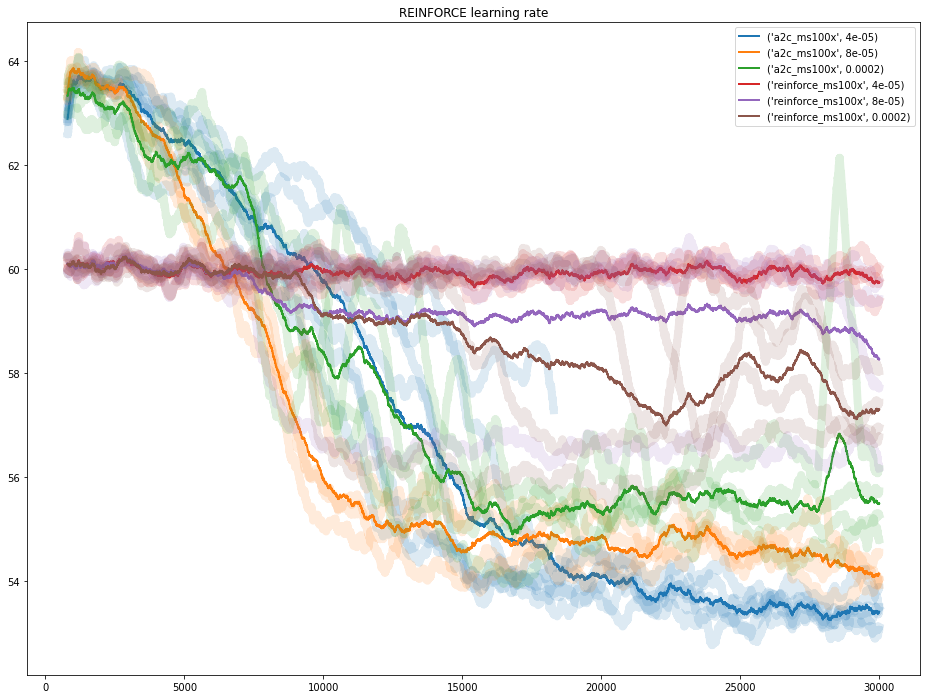

In [21]:
plt.figure(figsize=(16, 12))
plt.title("REINFORCE learning rate")
generate_variation_plot(df, ['agent_type', 'learning_rate'], 800)